<a href="https://colab.research.google.com/github/tejaswini1968/CNN-/blob/main/LEAF_DISEASE_DETECTION_USING_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PLANT LEAF DISEASE DETECTION USING CNN

In [55]:
import keras
import tensorflow
import numpy as np
import pickle
import cv2
import os
import random
from os  import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline



In [56]:
Number_of_epochs = 35
Batch_size = 32
default_image_size = tuple((175,175))
directory_root = r"/content/drive/MyDrive/PLANT  LEAF DISEASE DATA/TRAIN"
width = 175
height = 175
depth = 3


FUNCTION TO CONVERT IMAGE TO NUMPY ARRAY


In [57]:
def convert_image_to_array(image_dir) :
  image = cv2.imread(image_dir)
  image = cv2.resize(image, default_image_size)
  return img_to_array(image)


PREPARING LIST OF 15 DISEASE CATEGORIES

In [58]:
CATEGORIES = os.listdir(directory_root)

In [59]:
len(CATEGORIES)

15

PRINTING LIST OF ALL 15 DIESEASE CATEGORIES

In [60]:
CATEGORIES

['Tomato_Bacterial_spot',
 'Tomato_Leaf_Mold',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Late_blight',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Potato___healthy',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Potato___Early_blight']

FUNCTION TO READ ALL THE IMAGES AND THEIR DISEASE CATEGORIES IN A SINGLE LIST

In [61]:
data = []
for category in CATEGORIES:
  folder = os.path.join(directory_root,category)
  label = category
  for img in os.listdir(folder)[ :300]:
    img_path = os.path.join(folder, img)
    img_array = convert_image_to_array(img_path)
    data.append([img_array, label])


In [62]:
len(data)

4332

In [63]:
data[400]

[array([[[164., 162., 179.],
         [150., 149., 165.],
         [156., 155., 171.],
         ...,
         [155., 155., 169.],
         [158., 158., 172.],
         [153., 153., 167.]],
 
        [[156., 155., 171.],
         [163., 162., 178.],
         [147., 146., 162.],
         ...,
         [162., 162., 176.],
         [152., 152., 166.],
         [159., 159., 173.]],
 
        [[149., 148., 164.],
         [162., 161., 177.],
         [143., 142., 158.],
         ...,
         [166., 166., 180.],
         [155., 155., 169.],
         [162., 162., 177.]],
 
        ...,
 
        [[115., 115., 131.],
         [109., 109., 125.],
         [139., 139., 155.],
         ...,
         [138., 137., 146.],
         [164., 163., 172.],
         [151., 150., 159.]],
 
        [[120., 120., 136.],
         [107., 107., 123.],
         [133., 133., 149.],
         ...,
         [160., 159., 168.],
         [123., 122., 131.],
         [145., 144., 153.]],
 
        [[102., 102., 118.],
 

SEPARTING IMAGES AND LABELS 

In [64]:
image_list = []
labels_list = []
for features, labels in data:
  image_list.append(features)
  labels_list.append(labels)


In [65]:
len(image_list)

4332

In [66]:
len(labels_list)

4332

In [67]:
labels_list[:10]

['Tomato_Bacterial_spot',
 'Tomato_Bacterial_spot',
 'Tomato_Bacterial_spot',
 'Tomato_Bacterial_spot',
 'Tomato_Bacterial_spot',
 'Tomato_Bacterial_spot',
 'Tomato_Bacterial_spot',
 'Tomato_Bacterial_spot',
 'Tomato_Bacterial_spot',
 'Tomato_Bacterial_spot']

ONE HOT-ENCODING OF CATERGORY LABELS USING LABEL BINARIZER

In [68]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(labels_list)


In [69]:
len(image_labels)

4332

In [70]:
image_labels[10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
num_of_classes = len(label_binarizer.classes_)

In [72]:
print(num_of_classes)

15


In [73]:
print(label_binarizer.classes_)




['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


CONVERTING IMAGE LIST TO NP ARRAY,FLOAT32 TO FLOAT16,NORMALIZATION BY DIVIDING WITH 255

In [74]:
np_image_list = np.array(image_list)/255

In [75]:
np_image_list[0]

array([[[0.39607844, 0.39215687, 0.43137255],
        [0.39607844, 0.39215687, 0.42745098],
        [0.43529412, 0.43137255, 0.47058824],
        ...,
        [0.34901962, 0.34901962, 0.39607844],
        [0.33333334, 0.33333334, 0.38039216],
        [0.3764706 , 0.3764706 , 0.42352942]],

       [[0.38039216, 0.3764706 , 0.41568628],
        [0.36078432, 0.35686275, 0.39607844],
        [0.34901962, 0.34509805, 0.38431373],
        ...,
        [0.38039216, 0.38039216, 0.42745098],
        [0.36078432, 0.36078432, 0.40784314],
        [0.34901962, 0.34901962, 0.4       ]],

       [[0.40784314, 0.40392157, 0.44313726],
        [0.37254903, 0.36862746, 0.40784314],
        [0.35686275, 0.3529412 , 0.39215687],
        ...,
        [0.35686275, 0.35686275, 0.40784314],
        [0.3254902 , 0.3254902 , 0.37254903],
        [0.3019608 , 0.3019608 , 0.34901962]],

       ...,

       [[0.61960787, 0.6156863 , 0.627451  ],
        [0.6117647 , 0.60784316, 0.62352943],
        [0.6       , 0

SPLITTING THE DATA INTO TRAIN AND TEST-THIS TEST DATA WILL BE USED AS VALIDATION DATA

In [76]:
X_train, X_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.10, random_state=1)



In [77]:
len(X_train)

3898

In [78]:
len(X_test)

434

In [79]:
len(y_train)

3898

In [80]:
X_train[0].shape

(175, 175, 3)

In [81]:
y_train[0].shape

(15,)

CREATING INSTANCE FOR IMAGE AUGMENTATION FUNCTION

In [82]:
aug = ImageDataGenerator(rotation_range=25,
                         width_shift_range=0.1, 
                         height_shift_range=0.1,
                         shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode='nearest')



BUILDING THE CNN MODEL

In [83]:
model = Sequential()
inputshape = (height,width,depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3,3), padding="same", input_shape= inputshape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis= chanDim))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis= chanDim))
model.add(Conv2D(64, (3,3), padding="same" ))
model.add(Activation("relu"))
model.add(BatchNormalization(axis= chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis= chanDim))
model.add(Conv2D(128, (3,3), padding="same" ))
model.add(Activation("relu"))
model.add(BatchNormalization(axis= chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_of_classes))
model.add(Activation("softmax"))



In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 175, 175, 32)      896       
                                                                 
 activation_7 (Activation)   (None, 175, 175, 32)      0         
                                                                 
 batch_normalization_6 (Batc  (None, 175, 175, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 58, 58, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 58, 58, 64)       

In [85]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [86]:
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=["accuracy"])

In [87]:
model_history = model.fit_generator(
    aug.flow(X_train, y_train, batch_size= Batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // Batch_size,
    epochs=Number_of_epochs, verbose=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/35
121/121 [==============================] - 27s 212ms/step - loss: 1.6937 - accuracy: 0.5189 - val_loss: 8.7132 - val_accuracy: 0.0668
Epoch 2/35
121/121 [==============================] - 26s 210ms/step - loss: 1.2951 - accuracy: 0.6283 - val_loss: 11.7828 - val_accuracy: 0.1198
Epoch 3/35
121/121 [==============================] - 25s 209ms/step - loss: 1.0954 - accuracy: 0.6730 - val_loss: 8.4629 - val_accuracy: 0.1498
Epoch 4/35
121/121 [==============================] - 26s 211ms/step - loss: 0.8729 - accuracy: 0.7367 - val_loss: 3.7865 - val_accuracy: 0.3894
Epoch 5/35
121/121 [==============================] - 25s 209ms/step - loss: 0.7158 - accuracy: 0.7644 - val_loss: 3.9189 - val_accuracy: 0.4263
Epoch 6/35
121/121 [==============================] - 25s 210ms/step - loss: 0.6494 - accuracy: 0.7938 - val_loss: 0.7831 - val_accuracy: 0.7788
Epoch 7/35
121/121 [==============================] - 26s 210ms/step - loss: 0.5623 - accuracy: 0.8195 - val_loss: 6.4193 - val_a

PLOTING THE TRAIN ACCURACY VS VALIDATION ACCURACY AND TRAIN LOSS VS VALIDATION LOSS

In [88]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [89]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(train_acc) + 1)



PLOTING THE TRAIN ACCURACY VS VALIDATION ACCURACY

<function matplotlib.pyplot.show(*args, **kw)>

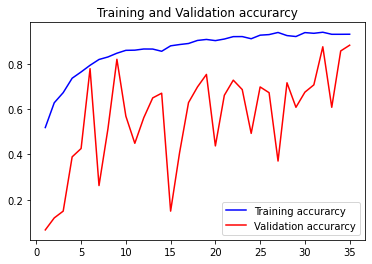

In [90]:
plt.plot(epochs,train_acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.show


PLOTING THE TRAIN LOSS VS VALIDATION LOSS

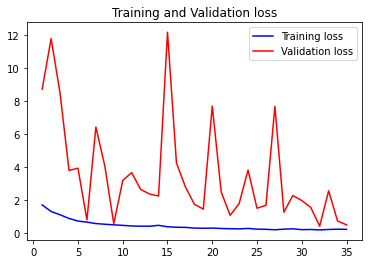

In [91]:
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


EVALUATING THE  PERFORMANC ON FINAL TEST IMAGES

In [92]:
root_directory_final_test= r'/content/drive/MyDrive/PLANT  LEAF DISEASE DATA/FINAL_TEST'

PRE-PROCESSING THE FINAL TEST DATA

In [93]:
data_final_test = []
for category in CATEGORIES:
  folder = os.path.join(root_directory_final_test,category)
  label_test = category
  for img in os.listdir(folder):
    img_path = os.path.join(folder, img)
    img_array = convert_image_to_array(img_path)
    data_final_test.append([img_array, label_test])


THERE ARE 300 IMAGES IN FINAL TEST DATA,20 IMAGES FOR EACH OF 15  CATEGORIES

In [94]:
len(data_final_test)

300

In [95]:
data_final_test[298]

[array([[[190., 177., 179.],
         [186., 173., 175.],
         [194., 181., 183.],
         ...,
         [153., 140., 142.],
         [152., 139., 141.],
         [154., 141., 142.]],
 
        [[193., 180., 182.],
         [191., 178., 180.],
         [192., 179., 181.],
         ...,
         [153., 140., 142.],
         [170., 157., 159.],
         [165., 152., 154.]],
 
        [[189., 176., 178.],
         [189., 176., 178.],
         [189., 177., 179.],
         ...,
         [148., 136., 137.],
         [153., 140., 142.],
         [145., 132., 134.]],
 
        ...,
 
        [[205., 194., 196.],
         [202., 191., 193.],
         [200., 189., 191.],
         ...,
         [150., 143., 146.],
         [141., 134., 137.],
         [146., 139., 142.]],
 
        [[203., 192., 194.],
         [201., 190., 192.],
         [201., 190., 192.],
         ...,
         [154., 148., 150.],
         [167., 160., 163.],
         [160., 153., 156.]],
 
        [[200., 189., 191.],
 

SEPARATING THE IMAGES AND LABELS OF FINAL TEST DATA

In [96]:
final_test_images = []
final_test_labels = []
for features, labels in data_final_test:
  final_test_images.append(features)
  final_test_labels.append(labels)


In [97]:
len(final_test_images)

300

In [98]:
len(final_test_labels)

300

ONE-HOT ENCODING OF FINAL TEST LABELS

In [99]:
final_test_labels_encode = label_binarizer.fit_transform(final_test_labels)

In [100]:
final_test_labels_encode[2]



array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

NORMALIZATION OF FINAL TEST IMAGES DATA

In [101]:
np_final_test_images =  np.array(final_test_images)/255

EVALUATION OF VALIDATION DATA

In [102]:
scores = model.evaluate(X_test, y_test)
print(f"Validation data Accuracy: {scores[1]*100}")



14/14 [==============================] - 0s 20ms/step - loss: 0.4857 - accuracy: 0.8825
Validation data Accuracy: 88.2488489151001


EVALUATION OF FINAL TEST DATA

In [103]:
scores = model.evaluate(np_final_test_images, final_test_labels_encode)
print(f"Final_Test Accuracy: {scores[1]*100}")


10/10 [==============================] - 0s 19ms/step - loss: 0.5869 - accuracy: 0.8367
Final_Test Accuracy: 83.66666436195374
